<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Naive_Bayes_(Algoritmo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimento com Naive Bayes
---


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



### Naive Bayes

É um **classificador probabilístico** utilizando **aprendizado supervisionado** baseado no **Teorema de Bayes**.

O *Naive Bayes* assume que há independência entre as features, por isso recebe o nome *naive*, ou seja, *ingênuo*, que possui **poucos parâmetros**, por isso sua **simplicidade** e **velocidade**.

Só para deixar registrado o **Teorema de Bayes** é:

$$
P(A|B)=\frac{P(B|A)*P(A)}{P(B)}
$$

Ou seja, a Probabilidade de A dado B é igual a Probabilidade de B dado A multiplicado por A. tudo isso sobre a Probabilidade de B.

Exemplo de Naive Bayes para classificação de texto:
* Sentença: *Eu **amo** meu cão, mas hoje ele está **terrível***!'
* Por haver independência das features, essa sentença pode ser considerada positiva
    * A **probabilidade de cada palavra é independente** das outras palavras
    * Essa independência é **raramente encontrada em cenários reais**
    * Se a palavra **amo** aparece mais vezes na base de dados em classificações positivas, pela *independência de features*, a probabilidade de ser positiva quando aparecer essa palavra é maior
    
* Veja os exemplos a seguir:
1. Eu amo meu cachorro: Positivo
2. O cachorro é mau em casa: Negativo
3. O gato é amoroso: Positivo
4. Eu odeio gatos e cachorros:Negativo

Agora vejamos a tabela de frequência:

$$Tabela$$

|Palavra|Positivo|Negativo|
|-|-|-|
|Cachorro |2|1|
|Amor|2 |-|
|Mau|-|1|
|Gato|1|1|
|Casa|-|1|
|**Total**|**5**|**4**|

Quando aparecer a palavra **cachorro** na frase terá **66%** (2 em 3) de ser positivo se considerada somente ela.

Quanto mais frequente a palavra em uma base de dados, mais importante é para o modelo.

É possivel calcular a **probabilidade** de uma palavra pertencer a uma classe se temos sua distribuição.


![sentimento](https://avante.biz/wp-content/uploads/Hugs-Wallpapers/Hugs-Wallpapers-048.jpg)


### Naive Bayes Multinomial

Como você pode ver [aqui](https://translate.google.com/translate?prev=_t&hl=en&ie=UTF-8&u=https://scikit-learn.org/stable/modules/naive_bayes.html&sl=auto&tl=en) há vários modelos que você pode utilizar. Aqui utilizaremos o **Multinomial**, mas vamos falar rapidamente sobre todos eles! O Naive Bayes é comumente utilizado em textos, mas não se restringe só a isso.

a) **Multinomial**
* Utiliza a frequência dos termos
* Muito utilizado em tarefas de **classificação textual**
b) **Bernoulli**
* Variação do algoritmo para **valores binários**
* Trabalha com a matriz de presença de valores.
c) **Gaussian**
* Variação do algoritmo para **valores continuos**
* Calcula a média e o desvio padrão dos valores de entrada para cada classe
* Assume que os valores estão em uma forma normal

### Bag of Words

**Bag of Words** é uma **modelagem** usada para pré-processar textos.

Mapeia a quantidade de termos e suas frequências.

É comum o *naive bayes* se sair bem junto a essa abordagem

Principal desvantagem? **alta dimensionalidade**, pois para cada palavra tem-se uma feature.

Exemplo:
* Modelo: "O cão está em casa?"
* Nova frase:    "O gato e o cão passarão aqui em casa?"
* Representação   1   0  0 1  1     0       0   1   1
    * Ou seja, fez a contagem da presença de cada palavra 
* A **frequência** é utilizada para treinar o **modelo**

No *Bag of Word* **não** se utiliza a classificação positiva e negativa

## Checklist
1. Definição do problema
2. Carga de dados e visualização
3. Pré-processamento e divisão dos dados
4. Machine Learning
5. Validação do modelo
6. Fazendo Tuning

# 1. Definição do problema

Redes e Midias socias como Facebook, Instagram, Twitter etc. são fontes de dados imensas.

É comum pessoas usarems esse locais para expor suas opiniões ou, muitas vezes, simplesmente desabafar algo felicidade ou até mesmo decepção. 

Neste caso em específico iremos utilizar uma base de dados do **twitter** com diversas opiniões sobre a ala **governamental de Minas Gerais**. Elas estão classificadas como **Positivo**, **Negativo** e **Neutro** e exatamente isso que faremos. Treinaremos nosso modelo para, ao fim, conseguir **classificar as frases** com essas classificações.

#  2. Carga de dados e visualização

**Importações**

In [ ]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Carga dos dados**

In [ ]:
dataset=pd.read_csv('/home/amador/dados/Tweets_Mg.csv',encoding='utf-8')

**Visualizando os primeiros dados**

In [ ]:
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Vamos visualizar os tipos dos dados**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

**Expandindo o tamanho da exibição de coluna de texto**

Quando visualizamos inicialmente, vimos que o próprio pandas "trunca" a visualização dos dados, porém vamos expandir a visualização da coluna **Text** para *melhorar a visualização*.

In [ ]:
pd.set_option('display.max_colwidth', 1)
dataset.Text.head(100)

0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                         
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                             
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                            
3     ��� https://t.co/BnDsO34qK0                                                                                                                
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5             
                                                                   ...                                                                           
95    #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… https://t.co/kHuZpKQaj5    

**Dropando linhas duplicadas com o parâmetro drop_duplicates**

Por ser uma coleta de dados é comum alguns dados serem coletados mais de uma vez, então esse parâmetro irá apagar essas *duplicatas*.

In [ ]:
dataset.drop_duplicates(['Text'],inplace=True)

**Visualizando a contagem**

Veja que a base desceu de **8199** para **5765**. Quantas duplicatas, hein?!

In [ ]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

**Criando função para remover colunas**

Veja que temos várias colunas *Unnamed*, para dropar uma por uma daria muito trabalho, então vamos criar uma função que irá fazer isso.

In [ ]:
for i in dataset.columns.values: # dataset.columns.values retorna o nome de cada coluna
    if i.startswith('Unnamed'):# método startswith retornará True se a sequência começar com o valor especificado, caso contrário, False.
        dataset.drop(i, axis=1, inplace=True)
        print ('Coluna Deletada:', i)

Coluna Deletada: Unnamed: 0
Coluna Deletada: Unnamed: 10
Coluna Deletada: Unnamed: 11
Coluna Deletada: Unnamed: 12
Coluna Deletada: Unnamed: 13
Coluna Deletada: Unnamed: 14
Coluna Deletada: Unnamed: 15
Coluna Deletada: Unnamed: 16
Coluna Deletada: Unnamed: 17
Coluna Deletada: Unnamed: 18
Coluna Deletada: Unnamed: 19
Coluna Deletada: Unnamed: 20
Coluna Deletada: Unnamed: 21
Coluna Deletada: Unnamed: 22
Coluna Deletada: Unnamed: 23
Coluna Deletada: Unnamed: 24


**Colunas já limpas**

In [ ]:
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

**Vamos visualizar a distribuição da tabela**

Veja que Negativo está em torno da metade do Neutro e chega perto de ser um terço das classificações positivas.

In [ ]:
dataset.Classificacao.value_counts()

Positivo    2840
Neutro      1974
Negativo    951 
Name: Classificacao, dtype: int64

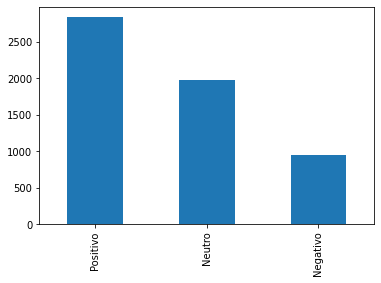

In [ ]:
# distribuição das classes
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar');

# 3. Pré-processamento e divisão dos dados

**Separando tweets de classes**

In [ ]:
tweets = dataset['Text']
classes = dataset['Classificacao']

**Gerando o modelo**

*CountVectorizer* converte uma coleção de documentos de texto em uma matriz de contagens de tokens.

O *analyzer="word"* é para analisar palavra por palavra.

In [ ]:
# gerando o modelo, vetorizando binariamente os dados
vectorizer = CountVectorizer(analyzer="word") # instanciando o método
freq_tweets = vectorizer.fit_transform(tweets) # transformando os dados

**Visualizando o tipo dos dados transformados**

In [ ]:
type(freq_tweets)

scipy.sparse.csr.csr_matrix

**Forma ou tamanho da matriz (linhas x colunas)**

Lembra que falei que a desvantagem é a *alta dimensionalidade*? pois é, temos agora *13029* features. 

In [ ]:
freq_tweets.shape

(5765, 13029)

**Imprimindo valores da matriz esparsa**

Como disse ao falar sobre as *bag of words*, uma matriz presença é criada. Na matriz abaixo só conseguimos visualizar números 0, por as features representadas aqui não terem presença naquelas colunas.

In [ ]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# 4. Machine Learning

**Criando e treinando o modelo**

In [ ]:
# criando o modelo com naive bayes multinomial
modelo=MultinomialNB()
# treinando o modelo
modelo.fit(freq_tweets,classes)

MultinomialNB()

**Criando novas instâncias**

In [ ]:
# testando com algumas instãncias
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

**Vetorizando as instâncias com o objeto vectorizer**

Lembre que para testar novas palavras, elas têm que ter passado pelos mesmos *procedimentos* que a base de dados que serviu para treinar o algoritmo.

Observe que aqui é *vectorizer.transform* e **não** *vectorizer.fit.transform*, pois o modelo já foi treinado e, agora está só fazendo a transformação.

In [ ]:
# transformando os dados de teste em vetores de palavras
freq_testes=vectorizer.transform(testes)

**Fazendo a classificação com o modelo**

Somente *modelo.predict(freq_testes)* retornaria uma lista com as classificações, então vamos concatenar as frases com as classificações para melhorar a visualização.

In [ ]:
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


**Quer saber as probabilidades de cada classe?**

Veja que, enquanto o modelo deu 82% da *primeira frase* ser 'Neutro' e 18% de ser 'Positivo', na *terceira frase* ele já nos deu 99% de ser 'Positivo'! É importante frisar que, em nenhum foi dado 100%, parece que nosso algoritmo não quis ser soberbo. Que bom! 

In [ ]:
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2) # round(2) para arredondar para dois valores após a virgula

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

# 5. Validação do modelo

Já falamos sobre as *métricas de validação* [aqui](https://bit.ly/2Siq0YU), então vamos somente visualizar agora!

**Cross validation**

Retorna o resultado médio entre as validações.

In [ ]:
# classificador, features, classes, nº de folds
resultados=cross_val_predict(modelo,freq_tweets,classes,cv=10)
resultados

array(['Neutro', 'Neutro', 'Neutro', ..., 'Positivo', 'Positivo',
       'Positivo'], dtype='<U8')

**Matriz de confusão**

margins=True é para exibir o *All*.

In [ ]:
print(pd.crosstab(classes,resultados,rownames=['Real'],colnames=['Predito'],margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo  846       100     5         951 
Neutro    206       1656    112       1974
Positivo  53        294     2493      2840
All       1105      2050    2610      5765


**Abaixo plotei o gráfico das distribuições novamente**

Mais abaixo explico o porquê.

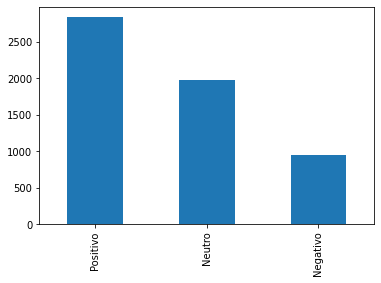

In [ ]:
# distribuição das classes
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar');

**Métricas**

Nosso modelo até que se saiu bem, contudo é importante que você veja que se saiu bem melhor com as classificações positivas e, se pegarmos por base a *precision* (precisão) se saiu pior quando *Neutro* e ainda pior como *Negativo*. 

Um grande problema que se enfrenta em alguns casos é a de classes desbalanceadas, [aqui](https://bit.ly/3nj6EkW) falo melhor sobre isso e mostro métodos de como proceder. 

Mas, por ora, classes desbalanceadas são um problema pois é comum que o algoritmo aprenda melhor sobre a classe com mais exemplos e piore nas demais. 

É o nosso caso, não?! Lembre que há em grande disparidade exemplos da classe 'Positivo', logo o algoritmo se sai melhor com ela.

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
# classes, cross val, nome das colunas (nesse caso, linhas)
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# 6. Fazendo Tuning

Fazer *tuning* é vital importância em seu projeto de *Data Science*!

[Aqui](https://bit.ly/30mKZ1q) falo melhor sobre ele e dou mais um exemplo. 

Você deve saber que nem sempre o *Tuning* irá melhorar seu modelo, mas irá, no minimo, fazer com que sua consciência fique tranquila em relação a esgotar os parâmetros do algoritmo. 

**Importação do GridSearchCV**

*GridSearchCV* é o modelo que usaremos para fazer o Tuning do modelo!

In [ ]:
from sklearn.model_selection import GridSearchCV

**Criando lista para o parâmetero alpha**

*alpha* força o aumento do peso que o algoritmo vai dar para dados em que não há classe que o defina.

In [ ]:
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Criando dicionário com o parâmetro**

In [ ]:
parametros_grid=dict(alpha=lista_alpha)

**Instanciando um modelo**

In [ ]:
nvModelo=MultinomialNB()

**Criando o objeto grid**

In [ ]:
# classificador, dicionário com parâmetro, nº de folds, métrica de avaliação
grid=GridSearchCV(nvModelo,parametros_grid,cv=10,scoring='accuracy')

**Visualizando os tweets**

In [ ]:
tweets.head()

0    ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                            
1    � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                
2    �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                               
3    ��� https://t.co/BnDsO34qK0                                                                                                   
4    ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5
Name: Text, dtype: object

**Rodando o grid**

In [ ]:
# vetorizando novamente os tweets
freq_tweets=vectorizer.fit_transform(tweets)
# treinando o grid com dados vetorizados e as classes
grid.fit(freq_tweets,classes)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

**Visualizando os melhores scores**

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.01505802, 0.01501462, 0.01586614, 0.01521742, 0.01519849,
        0.01505675, 0.014606  , 0.01579881, 0.01440899, 0.0196496 ]),
 'std_fit_time': array([0.00038478, 0.00033871, 0.00059125, 0.00044328, 0.00047907,
        0.00110818, 0.0001634 , 0.00191811, 0.00012029, 0.00366618]),
 'mean_score_time': array([0.00095401, 0.00094779, 0.00102782, 0.00098681, 0.00097404,
        0.000946  , 0.0009285 , 0.00100348, 0.00092754, 0.00125499]),
 'std_score_time': array([4.68323765e-05, 7.36508951e-05, 1.44606322e-04, 1.53169752e-04,
        7.64660979e-05, 1.10524888e-04, 1.44455690e-05, 1.92749189e-04,
        4.14562127e-05, 2.60301596e-04]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha'

**Melhor parâmetro**

Veja que o melhor *alpha* é o padrão do *MultinomialNB*, ou seja, *1*, logo não há como melhorar o modelo.

In [ ]:
grid.best_params_

{'alpha': 1}

**Melhor score**

In [ ]:
grid.best_score_

0.8664846307529368

**Alterando o parâmetro alpha arbitrariamente**

Vamos passar o *alpha=5*.

Para mostrar a sensibilidade do algoritmo às mudanças de parâmetro.

Veja que há uma queda nos valores.

In [ ]:
# instanciando o vectorizer
vectorizer = CountVectorizer(analyzer="word")
# transformando
freq_tweets = vectorizer.fit_transform(tweets)
# instanciando o classificador
modelo = MultinomialNB(alpha=5)
# treinando o classificador
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5)

In [ ]:
# vetorizando os testes
freq_testes = vectorizer.transform(testes)

In [ ]:
# predição
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [ ]:
# fazendo validação dos resultados
# cross validation com classificador treinado, features,classes e nº de folds
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)
#metricas
sentimento=['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.89      0.92      0.90      2840
    Negativo       0.84      0.78      0.81       951
      Neutro       0.79      0.79      0.79      1974

    accuracy                           0.85      5765
   macro avg       0.84      0.83      0.83      5765
weighted avg       0.85      0.85      0.85      5765



/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).



[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>